In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Plot #1: show if there is potential correlation between daily short trips & Stock market index

In [3]:
## read data
org_data = pd.read_csv("Transportation_Network_Providers_-_Trips.csv")

In [5]:
## only consider short trip for now (short trip: miles<5)
short_data = org_data[org_data['Trip Miles']<5]

In [6]:
## Take a 100,000 subsample for analysis speed purpose, be able to use the full data on AWS for the project
short_sample = short_data.sample(n=100000, random_state=1)

In [7]:
## covvert date object to datetime
short_sample['date'] = pd.to_datetime(short_sample['Trip End Timestamp'])

In [8]:
## exact detailed info
short_sample['month'] = pd.DatetimeIndex(short_sample['date']).month
short_sample['day'] = pd.DatetimeIndex(short_sample['date']).day
short_sample['time'] = pd.DatetimeIndex(short_sample['date']).time

In [9]:
## clean the sample data, remove NA and only keep November and December data
short_sample = short_sample[short_sample['Dropoff Centroid Latitude'].notna()]
short_sample = short_sample[short_sample['month']>1]

In [10]:
## Count daily trips for plotting
day_trip = pd.DataFrame(short_sample[['Trip ID','month','day']].groupby(['month','day']).count())
day_trip = day_trip.reset_index()

In [11]:
## Read Nasdaq Composite data, downloaded from Yahoo finance
## https://finance.yahoo.com/quote/%5EIXIC/history?period1=1541044800&period2=1546232400&interval=1d&filter=history&frequency=1d
nad_data = pd.read_csv('nasdaq.csv')

In [12]:
## get date information
nad_data['date'] = pd.to_datetime(nad_data['Date'])
nad_data['month'] = pd.DatetimeIndex(nad_data['date']).month
nad_data['day'] = pd.DatetimeIndex(nad_data['date']).day

In [13]:
## merge two summary data
nad_trip = pd.merge(nad_data, day_trip,how='left',left_on=['month','day'],right_on=['month','day'])

C:\Users\liuxi\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


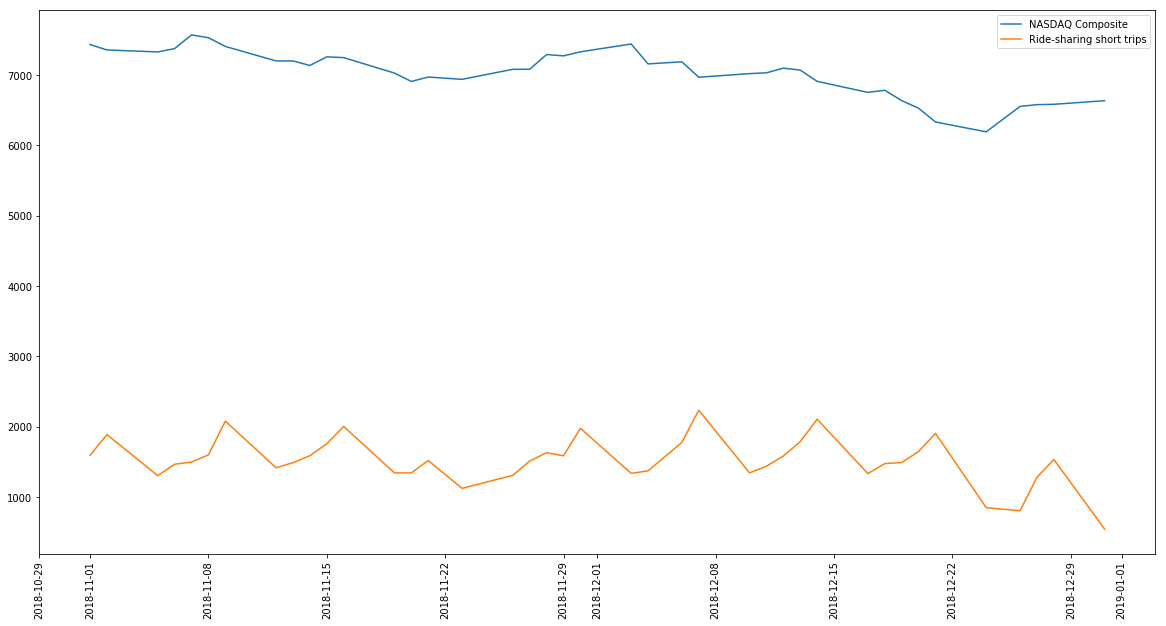

In [14]:
## Plot the trend of daily short trips vs. Nasdaq Composite daily trend
plt.figure(figsize=(20,10))
plt.plot(nad_trip['date'], nad_trip['Adj Close'], label='NASDAQ Composite')
plt.plot(nad_trip['date'], nad_trip['Trip ID'], label='Ride-sharing short trips')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.show()

### Perspection: it seems there are correlation between short trips and Nasdaq Index, with a better defined business market index, the correlation would be revealed.

### Plot #2: trip origin and destination: show the dynamics of travel behaviors

In [ ]:
import geopandas
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [ ]:
gdf_origin = geopandas.GeoDataFrame(short_sample, geometry=[Point(x, y) for x, y in zip(short_sample['Pickup Centroid Latitude'], short_sample['Pickup Centroid Longitude'])])

In [ ]:
gdf_dest = geopandas.GeoDataFrame(short_sample, geometry=[Point(x, y) for x, y in zip(short_sample['Dropoff Centroid Latitude'], short_sample['Dropoff Centroid Longitude'])])

In [ ]:
# We can now plot our GeoDataFrame.
plt.figure(figsize=(50,50))
gdf_origin.plot(ax=ax, color='green',figsize=(20,10))
gdf_dest.plot(ax=ax, color='red',figsize=(20,10))

plt.show()

### The plot was not produced due to the time limit. It suppose to show how the people move on a trip basis. It could be further broken down to hourly basis, link to the local business locations and conduct further analysis.